<a href="https://colab.research.google.com/github/LongNguyen1984/TimeSeriesWithPython/blob/main/readPPGinVistro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

## Read folder contains CVS files

In [130]:
import pandas as pd
from pathlib import Path

def read_folder(csv_folder):
    ''' Input is a folder with csv files; return list of data frames.'''
    csv_folder = Path(csv_folder).absolute()
    csv_files = [f for f in csv_folder.iterdir() if f.name.endswith('csv')]
    # the assign() method adds a helper column rating
    dfs = [
        pd.read_csv(csv_file).assign(rating_src = f'rating-{idx}')
        for idx, csv_file in enumerate(csv_files, 1)
    ]
    return csv_files, dfs

In [131]:
csv_folder = 'drive/MyDrive/Dataset/PPGinVitro'
csv_files, dfs = read_folder(csv_folder)

### Check the files 

In [132]:
csv_files

[PosixPath('/content/drive/MyDrive/Dataset/PPGinVitro/water1.csv'),
 PosixPath('/content/drive/MyDrive/Dataset/PPGinVitro/water10g.csv'),
 PosixPath('/content/drive/MyDrive/Dataset/PPGinVitro/water20g.csv'),
 PosixPath('/content/drive/MyDrive/Dataset/PPGinVitro/water2.csv'),
 PosixPath('/content/drive/MyDrive/Dataset/PPGinVitro/water5g.csv'),
 PosixPath('/content/drive/MyDrive/Dataset/PPGinVitro/water15g.csv'),
 PosixPath('/content/drive/MyDrive/Dataset/PPGinVitro/water25g.csv'),
 PosixPath('/content/drive/MyDrive/Dataset/PPGinVitro/water35g.csv'),
 PosixPath('/content/drive/MyDrive/Dataset/PPGinVitro/water45g.csv'),
 PosixPath('/content/drive/MyDrive/Dataset/PPGinVitro/water30g.csv'),
 PosixPath('/content/drive/MyDrive/Dataset/PPGinVitro/water50g.csv'),
 PosixPath('/content/drive/MyDrive/Dataset/PPGinVitro/water40g.csv'),
 PosixPath('/content/drive/MyDrive/Dataset/PPGinVitro/water0.csv')]

In [135]:
dfs[2]


,525nmC1,525nmC2,630nmC1,630nmC2,850nmC1,850nmC2,940nmC1,940nmC2,rating_src
0,57120,74955,38241,118400,95476,243396,104392,226567,rating-3
1,56911,74741,37319,118434,95250,243029,104251,226444,rating-3
2,57051,74976,38189,118605,95315,243178,104447,226546,rating-3
3,57095,75027,38288,118400,95447,243247,104528,226453,rating-3
4,57150,74802,38266,118332,95434,243161,104366,226385,rating-3
...,...,...,...,...,...,...,...,...,...
6917,56480,74550,38982,118268,96974,242841,106456,227199,rating-3
6918,56549,74643,37780,118404,97196,242974,106644,227357,rating-3
6919,56497,74571,37720,118203,97213,242884,106516,227144,rating-3
6920,56511,74430,38961,118289,97209,242773,106589,227182,rating-3


In [87]:
import pandas as pd

dataset = pd.read_csv('drive/MyDrive/Dataset/PPGinVitro/water1.csv', header=0)

In [88]:
dataset.describe()

,525nmC1,525nmC2,630nmC1,630nmC2,850nmC1,850nmC2,940nmC1,940nmC2
count,6968.000000,6968.000000,6968.000000,6968.000000,6968.000000,6968.000000,6968.000000,6968.000000
mean,73923.271670,72139.381028,75375.697474,126659.460821,180959.994259,249968.848881,184229.084099,378563.387342
std,126.719143,195.315227,155.703873,198.938670,318.499316,536.260976,176.974232,340.529592
min,73471.000000,71581.000000,74912.000000,126116.000000,180149.000000,248741.000000,183780.000000,377784.000000
25%,73837.000000,72003.000000,75270.000000,126526.000000,180720.000000,249573.000000,184108.000000,378338.000000
50%,73918.000000,72135.000000,75373.000000,126649.000000,180955.000000,249986.000000,184210.000000,378509.000000
75%,74004.000000,72271.000000,75479.000000,126774.000000,181190.000000,250383.000000,184321.000000,378719.000000
max,74567.000000,73001.000000,76106.000000,127793.000000,182381.000000,252081.000000,185102.000000,380395.000000


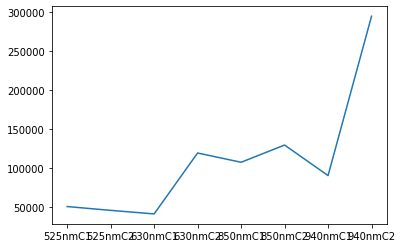

In [40]:
from matplotlib import gridspec

import seaborn as sns
import scipy.stats as st
plt.plot(dataset.describe().loc['mean'])

In [63]:
data = []

In [142]:
dataset.describe().loc['mean']

525nmC1     73923.271670
525nmC2     72139.381028
630nmC1     75375.697474
630nmC2    126659.460821
850nmC1    180959.994259
850nmC2    249968.848881
940nmC1    184229.084099
940nmC2    378563.387342
Name: mean, dtype: float64

In [65]:
data.append(dataset.describe().loc['mean'].to_list())

In [66]:
data[0]

[50699.92848020434,
 45808.22375478927,
 41266.5006385696,
 119200.14010217114,
 107339.25683269477,
 129384.60574712644,
 90305.0877394636,
 294142.31315453385]

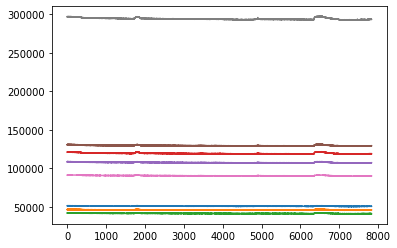

In [47]:
plt.plot(dataset)

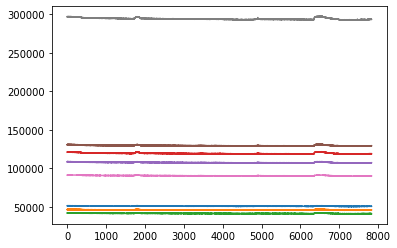

In [17]:
plt.plot(dataset.describe())

## Using Glob to read multiple files

In [186]:
import glob
## specific folder
path = csv_folder + '/water*.csv'
glob.iglob(path)
## list the filename
filenames = [file for file in glob.iglob(path)]

## Sort string

In [191]:
filenames.sort(reverse=False)

In [192]:
filenames

['drive/MyDrive/Dataset/PPGinVitro/water00g.csv',
 'drive/MyDrive/Dataset/PPGinVitro/water01g.csv',
 'drive/MyDrive/Dataset/PPGinVitro/water02g.csv',
 'drive/MyDrive/Dataset/PPGinVitro/water05g.csv',
 'drive/MyDrive/Dataset/PPGinVitro/water10g.csv',
 'drive/MyDrive/Dataset/PPGinVitro/water15g.csv',
 'drive/MyDrive/Dataset/PPGinVitro/water20g.csv',
 'drive/MyDrive/Dataset/PPGinVitro/water25g.csv',
 'drive/MyDrive/Dataset/PPGinVitro/water30g.csv',
 'drive/MyDrive/Dataset/PPGinVitro/water35g.csv',
 'drive/MyDrive/Dataset/PPGinVitro/water40g.csv',
 'drive/MyDrive/Dataset/PPGinVitro/water45g.csv',
 'drive/MyDrive/Dataset/PPGinVitro/water50g.csv']

###Turning to dataframes

In [193]:
dfs = [pd.read_csv(filename) for filename in filenames]

In [194]:
dfs[12].describe()

,525nmC1,525nmC2,630nmC1,630nmC2,850nmC1,850nmC2,940nmC1,940nmC2
count,11585.000000,11585.000000,11585.000000,11585.000000,11585.000000,11585.000000,11585.000000,11585.000000
mean,72623.163660,54319.800518,44702.155978,118091.036167,93020.644972,102092.358740,118206.019422,256838.642814
std,4682.862563,162.099250,4179.671485,207.229001,6318.061378,198.616263,7720.658438,400.968803
min,50226.000000,53823.000000,25315.000000,117436.000000,66343.000000,101482.000000,87372.000000,255676.000000
25%,69516.000000,54202.000000,41849.000000,117948.000000,89897.000000,101956.000000,114377.000000,256546.000000
50%,71465.000000,54321.000000,44762.000000,118101.000000,93864.000000,102088.000000,119261.000000,256849.000000
75%,77501.000000,54437.000000,47134.000000,118226.000000,97085.000000,102229.000000,122772.000000,257071.000000
max,80910.000000,54838.000000,54437.000000,118963.000000,104938.000000,102929.000000,132959.000000,258730.000000


In [138]:
data.append(dfs[0].describe().loc['mean'].to_list())

In [357]:

dataMean = [df.describe().loc['mean'].to_list() for df in dfs]

dataMean

[[419197.1797279403,
  109308.71259179006,
  114456.08649331889,
  130060.03683640303,
  203354.44895870952,
  453812.3785963645,
  420045.13747441914,
  717214.2139159745],
 [73923.27167049369,
  72139.38102755454,
  75375.69747416762,
  126659.46082089552,
  180959.99425947186,
  249968.848880597,
  184229.08409873708,
  378563.3873421355],
 [50699.92848020434,
  45808.22375478927,
  41266.5006385696,
  119200.14010217114,
  107339.25683269477,
  129384.60574712644,
  90305.0877394636,
  294142.31315453385],
 [43272.764868603044,
  46353.50597258896,
  49920.51515151515,
  131595.33723123348,
  90877.79328555262,
  128930.01622029423,
  114078.37646171256,
  254936.53941908714],
 [39956.540678474936,
  55913.81447012909,
  47389.68072650856,
  116438.16946862804,
  96632.9120384269,
  215708.69093365356,
  147732.73251275893,
  297135.9539177424],
 [42924.17436435736,
  41750.567179846046,
  34255.92348961978,
  105780.6307441101,
  80394.61884767903,
  97525.90097970609,
  70313.834

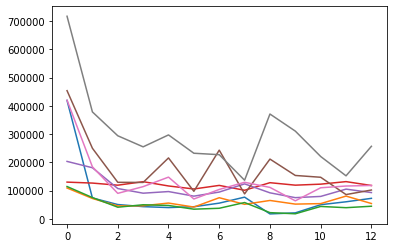

In [358]:
plt.plot(dataMean)

In [155]:
x = list(dataset.describe())
y = dataset.describe().loc['mean']

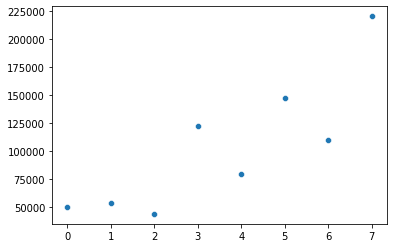

In [200]:
sns.scatterplot(data=dataMean[10])

In [359]:
results = pd.DataFrame(dataMean, columns = x)

In [378]:
results

,525nmC1,525nmC2,630nmC1,630nmC2,850nmC1,850nmC2,940nmC1,940nmC2
0,419197.179728,109308.712592,114456.086493,130060.036836,203354.448959,453812.378596,420045.137474,717214.213916
1,73923.271670,72139.381028,75375.697474,126659.460821,180959.994259,249968.848881,184229.084099,378563.387342
2,50699.928480,45808.223755,41266.500639,119200.140102,107339.256833,129384.605747,90305.087739,294142.313155
3,43272.764869,46353.505973,49920.515152,131595.337231,90877.793286,128930.016220,114078.376462,254936.539419
4,39956.540678,55913.814470,47389.680727,116438.169469,96632.912038,215708.690934,147732.732513,297135.953918
5,42924.174364,41750.567180,34255.923490,105780.630744,80394.618848,97525.900980,70313.834383,232270.671682
6,55652.856400,74809.017336,37473.659636,118438.246027,94854.473418,243216.842242,104086.553742,227177.093615
7,76887.421501,51450.343065,57788.997995,101246.630748,123813.961784,88432.477384,129445.502193,136726.598922
8,17501.346299,65137.588843,22025.985466,128028.494245,92167.001596,211597.322356,111340.710325,371079.223641
9,21199.354085,52210.388961,17949.958714,119272.740439,75055.771947,153619.287158,63833.950674,310599.737614


### Take the name data 

In [352]:
name = [filename.strip('.csv').replace('water','').split('/')[-1] for filename in filenames]

In [385]:
results.insert(0, "Weight", name)

### Using matplotlib plt

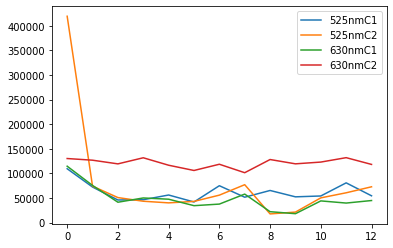

In [355]:
plt.plot(results[['525nmC2', '525nmC1','630nmC1','630nmC2']])
plt.legend(x)
plt.show()

### Using seaborn sns

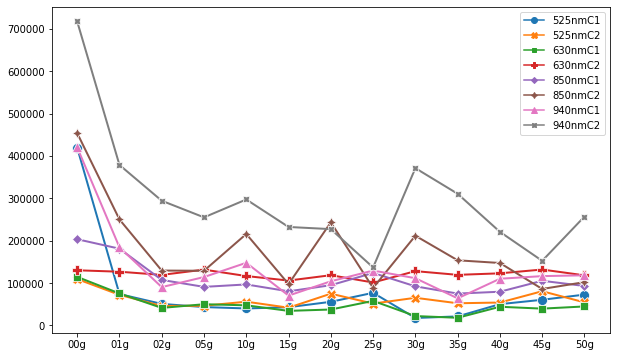

In [425]:
fig, axs = plt.subplots(figsize=(10,6))
sns.lineplot(data = results,  markers=True, dashes=False, linewidth=2, ms=10)
## Must setup set_xticks if not will missing in the label
axs.set_xticks(range(len(results)))
labels = name[0:13]
axs.set_xticklabels(labels=labels);


In [402]:
len(results)

13

### Using multiplot from dataframe

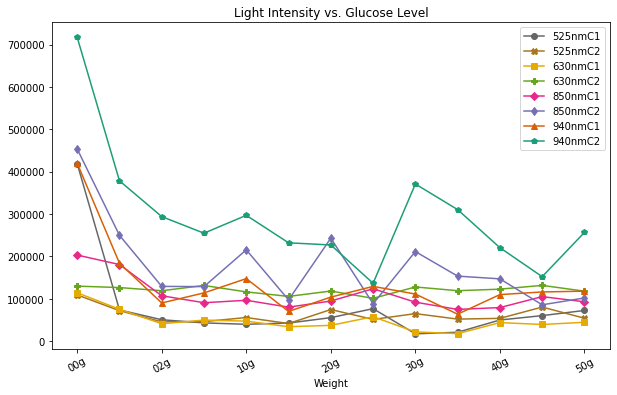

In [398]:
from matplotlib import markers
# get all possible shapes
all_shapes = list(markers.MarkerStyle.markers.keys()) #'-o'
markers = ['-o', '-X', '-s', '-P','-D','-d', '-^', '-p', '-x',  '-*', '-<', '-D', '-h', '->']
results.plot(kind='line',title= 'Light Intensity vs. Glucose Level', style=markers, cmap='Dark2_r',figsize=(10,6), rot=30, x ='Weight');

#locs, _ = plt.xticks()
#plt.xticks(ticks= locs, labels=name)